In [1]:
from asa_simulation.data import get_data, clean_data
from asa_simulation.preprocessor import preprocess


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


In [2]:
print("Fetching keyword data")
start_date = "2023-07-01"
end_date = "2023-10-01"

market = "('US', 'DE')"


df_market = get_data(start_date=start_date, end_date=end_date, dataset_id="adobe", market=market)


df_market_clean = clean_data(df_market, start_date=start_date, end_date=end_date)

Fetching keyword data

Load data from local CSV...


/Users/moe/code/mabuhalala/AI/asa_simulation/asa_simulation/data.py:22: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cache_path)


✅ Data loaded, with shape (2183198, 35)

Clean data...

Load data from local CSV...
✅ Data cleaned, with shape (1684644, 20)


In [3]:
df_clusters = preprocess(df_market_clean)

/Users/moe/code/mabuhalala/AI/asa_simulation/asa_simulation/preprocessor.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_0["cluster"] = k_means_clusterer(X=X_c, k=7)
/Users/moe/code/mabuhalala/AI/asa_simulation/asa_simulation/preprocessor.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_0["cluster_name"] = df_cluster_0["cluster"].map(cluster_names)


In [4]:
df_clusters

,date,keyword_id,keyword,country_or_region,share_of_voice,bid,taps,local_spend,impressions,installs,cpi,cpt,ttr,cvr,cluster,cluster_name
71,2023-07-01,18611697,adobe pdf,US,0.65,15.47,20.0,23.8839,102.0,9.0,2.653767,1.194195,0.196078,0.450000,5,VLP_VHC
77,2023-07-01,18611944,adobe acrobat reader,US,0.55,13.65,11.0,15.4148,33.0,6.0,2.569133,1.401345,0.333333,0.545455,5,VLP_VHC
386,2023-07-01,104493991,adobe lightroom,US,0.05,57.50,7.0,3.8231,20.0,7.0,0.546157,0.546157,0.350000,1.000000,5,VLP_VHC
389,2023-07-01,104493994,lightroom,US,0.05,115.00,135.0,77.0115,382.0,98.0,0.785832,0.570456,0.353403,0.725926,2,LP_HC
396,2023-07-01,104494821,light room,US,0.85,48.88,49.0,56.2852,132.0,41.0,1.372810,1.148678,0.371212,0.836735,0,MP_LC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684462,2023-10-01,1458154147,meme maker,US,0.05,4.40,14.0,42.1324,168.0,4.0,10.533100,3.009457,0.083333,0.285714,4,MP_MC
1684477,2023-10-01,1458996794,scanner app,DE,0.15,2.50,40.0,48.9500,169.0,28.0,1.748214,1.223750,0.236686,0.700000,0,MP_LC
1684478,2023-10-01,1458996795,pdf scanner,DE,0.05,2.80,15.0,26.8171,66.0,7.0,3.831014,1.787807,0.227273,0.466667,4,MP_MC
1684479,2023-10-01,1458996796,scanner app kostenlos,DE,0.15,2.80,28.0,46.8214,70.0,21.0,2.229590,1.672193,0.400000,0.750000,0,MP_LC


# Clusters

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

import numpy as np


In [8]:
df_market_clean["cpi"] = df_market_clean["local_spend"] / df_market_clean["installs"]
df_market_clean["cpt"] = df_market_clean["local_spend"] / df_market_clean["taps"]
df_market_clean['ttr'] = df_market_clean['taps'] / df_market_clean['impressions']
df_market_clean['cvr'] = df_market_clean['installs'] / df_market_clean['taps']

df_market_clean.fillna(0,inplace=True)
df_market_clean.replace([np.inf, -np.inf], 0, inplace=True)

In [9]:

X_raw = df_market_clean[['installs',
                          'cpi',
                          'impressions']]

scaler = RobustScaler()
X = scaler.fit_transform(X_raw)

In [10]:
# elbow method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

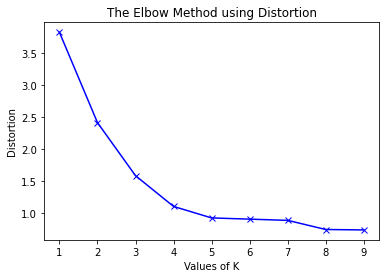

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [12]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

df_market_clean["cluster"] = y_pred

In [14]:
df_market_clean.groupby("cluster").nunique()

,date,campaign_id,campaign_name,ad_group_id,ad_group_name,keyword_id,keyword,country_or_region,match_type,share_of_voice,...,ttr,taps,local_spend,impressions,installs,avg_cpt,avg_cpa,cpi,cpt,cvr
cluster,,,,,,,,,,,,,,,,,,,,,
0,93,119,119,660,468,18611,10731,2,1,11,...,3067,220,17170,634,173,13754,12497,14449,17300,1015
1,93,2,2,2,2,2,2,1,1,5,...,138,132,138,135,135,135,136,138,138,138
2,93,16,16,17,13,22,16,2,1,11,...,617,350,619,510,314,613,600,608,619,533
